In [2]:
pip install handcalcs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import handcalcs.render
import math
from pint import UnitRegistry
u=UnitRegistry(auto_reduce_dimensions=True)

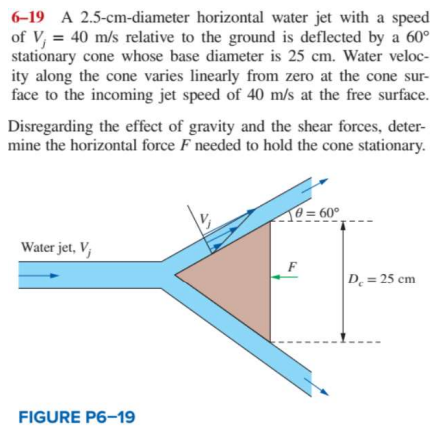
## Solution:
Given a water jet with its properties, and its relativity to the ground of the cone, the horizontal force F needed to hold the cone stationary must be determined.

## Assumptions:
1. Disregarding the effect of gravity and the shear forces. 

2. Water velocity varies linearly from zero at the cone surface to the incoming jet speed of $V_{j} = 40 \dfrac{m}{s}$ at the free surface.

3. Water is discharged into the atmosphere, and the gate pressure at the outlet is $0$

4. Flow is steady and incompressible

5. Water density is $1000 \dfrac{kg}{m^3}$


In [2]:
%%render long param
pi = math.pi
D_h = 2.5*u.cm 
V_j = 40*u.m/u.s
V_i = 0 #initial velocity
theta = 60*(pi/180) #degrees to radians
D_c = 25*u.cm
rho = 1000*(u.kg/u.m**3) #density
depth = 1*u.cm

<IPython.core.display.Latex object>

## Analysis:
Consider the front view of the cone and apply the conservation of mass

$0 = -Q_{j} + \int_{A}V_{exit}dA$

$Q_{j}\approx(\dfrac{V_{j}}{2})(\pi)(D_c)(h)$

In [4]:
%%render
h = ((pi/4)*(D_h**2)*(40))/((40/2)*(pi)*(D_c))

<IPython.core.display.Latex object>

Use the linear momentum equation in the x-direction

\begin{equation*}
\int \vec{V} \rho (\vec{V}\cdot \vec{n}) dA = \Sigma F_x \\
-V_j \rho V_j A_1 + \int_0^h (Vcos\theta)\rho V (\pi D_c) dY = -F
\end{equation*}

From the linear velocity equation, $V = a + bY$ and the initial conditions given

$V = 32000Y$, where $Y = h$

In [5]:
%%render long
V = V_j/h 
F_neg = -(V_j**2)*(pi/4)*(rho)*(D_h**2) + (rho)*(pi)*(math.cos(theta))*(D_c)*(V**2)*((h**3)/3)
F = F_neg*-1



<IPython.core.display.Latex object>

In [6]:
print(F.to('N'))

523.5987755982987 newton


## Discussion:
By finding the velocity with linear velocity and using the linear momentum equation, the force needed to hold the cone stationary is 523.6 N.
